In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np

import librosa
import IPython.display as ipd
from scipy.io import wavfile

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [4]:
def conta_file_wav(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                # Costruisci il percorso completo del file
                file_path = os.path.join(root, file)
                
                # Rimuovi caratteri indesiderati dal nome del file
                file_path = file_path.replace('\x00', '')
                
                # Incrementa il conteggio
                count += 1
                
    return count

# Specifica il percorso della cartella da controllare
cartella_da_controllare = r"..\data"

# Ottieni il conteggio dei file .wav
numero_file_wav = conta_file_wav(cartella_da_controllare)

# Stampa il risultato
print(f"Numero totale di file .wav: {numero_file_wav}")

Numero totale di file .wav: 64727


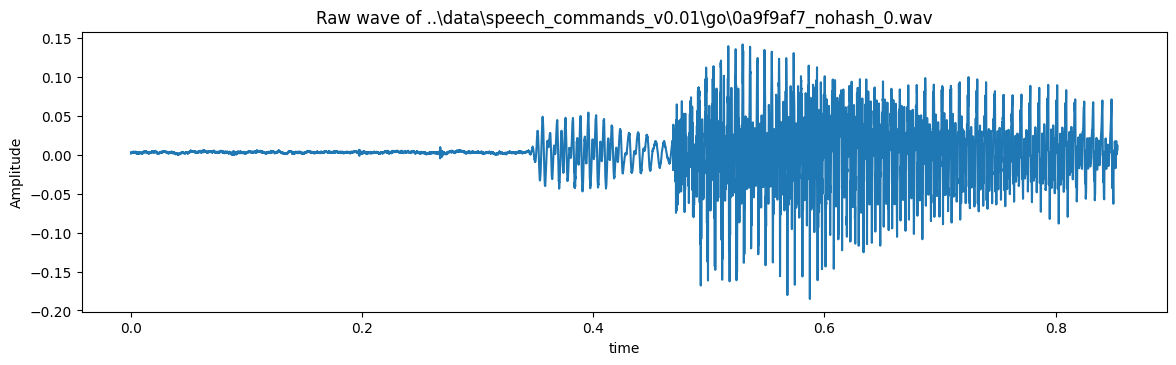

In [5]:
file_path = r"..\data\speech_commands_v0.01\go\0a9f9af7_nohash_0.wav"


# Carica il file audio con il percorso corretto
samples, sample_rate = librosa.load(file_path, sr=16000)

# Calcola il tempo correttamente
time = np.linspace(0, len(samples)/sample_rate, len(samples))

# Plotta il grafico
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + file_path)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(time, samples)

# Visualizza il grafico
plt.show()

In [6]:
sample_rate=40000
samples, sample_rate = librosa.load(r'..\data\speech_commands_v0.01\yes/0a7c2a8d_nohash_0.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [7]:


file_path = r"..\data\speech_commands_v0.01\go\0a9f9af7_nohash_0.wav"


# Resample to the target sampling rate (e.g., 8000 Hz)
target_sample_rate = 8000
# Load example trumpet signal
y, sr = librosa.load(file_path)
# Resample to the target sampling rate (e.g., 8000 Hz)
samples_resampled = librosa.resample(y, orig_sr=sr, target_sr=8000)

# Play the resampled audio
ipd.Audio(samples_resampled, rate=target_sample_rate)


In [8]:
train_audio_path = '..\data\speech_commands_v0.01/'
labels=os.listdir(train_audio_path)

In [9]:
labels

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']

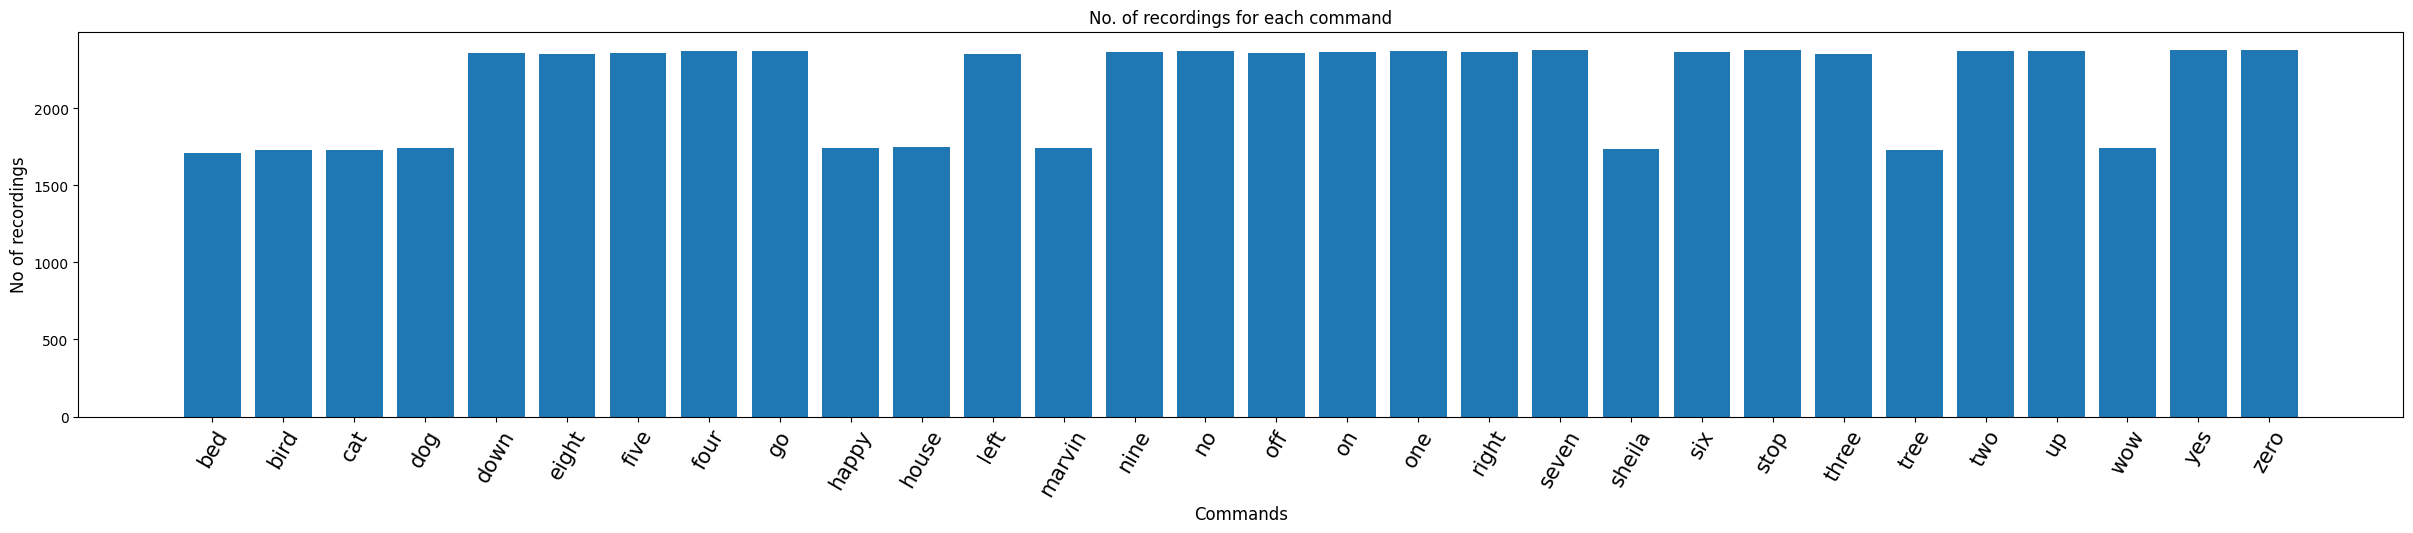

In [10]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir('../data/speech_commands_v0.01' + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


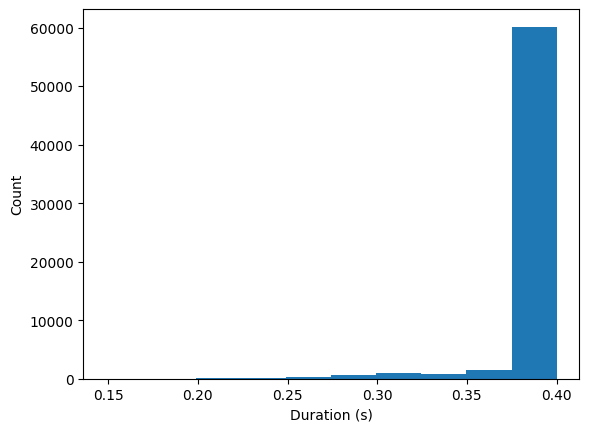

In [11]:
train_audio_path = '../data/speech_commands_v0.01/'
labels = os.listdir(train_audio_path)

duration_of_recordings = []

for label in labels:
    waves = [f for f in os.listdir(os.path.join(train_audio_path, label)) if f.endswith('.wav')]
    for wav in waves:
        _, samples = wavfile.read(os.path.join(train_audio_path, label, wav))
        duration_of_recordings.append(float(len(samples) / sample_rate))
plt.hist(np.array(duration_of_recordings))
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.show()

In [12]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        # Load example trumpet signal
        y, sr = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        # Resample to the target sampling rate (e.g., 8000 Hz)
        samples = librosa.resample(y, orig_sr=sr, target_sr=8000)

        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

bed
bird
cat
dog
down
eight
five
four
go
happy
house
left
marvin
nine
no
off
on
one


KeyboardInterrupt: 

In [32]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
58252


In [33]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

58252
(8000,)


array([-0.00302556, -0.00427494, -0.00369081, ..., -0.00357123,
       -0.00334684, -0.00407409], dtype=float32)

In [7]:
len(set(all_label))

NameError: name 'all_label' is not defined

In [36]:
classes

['bed',
 'bird',
 'cat',
 'dog',
 'down',
 'eight',
 'five',
 'four',
 'go',
 'happy',
 'house',
 'left',
 'marvin',
 'nine',
 'no',
 'off',
 'on',
 'one',
 'right',
 'seven',
 'sheila',
 'six',
 'stop',
 'three',
 'tree',
 'two',
 'up',
 'wow',
 'yes',
 'zero']